In [2]:
from math import sqrt, exp
from random import random, gauss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

1. Построить частичные суммы в представлении Винера (в виде тригонометрических сумм) для броуновского движения. Проверить, что полученный процесс имеет независимые нормальные приращения – измерить значения процесса в моменты i/n, найти приращения, построить ЭФР и проверить ее на нормальность.

In [1]:
pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4


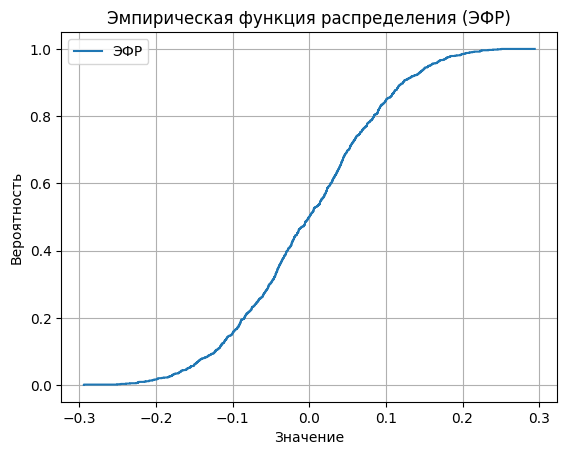

p-значение теста: 0.3444339292270795


In [4]:
from statsmodels.distributions.empirical_distribution import ECDF

def compute_lambda(i):
    return 1 / (-np.pi/ 2 + np.pi * i)

def psi(i, t):
    return np.sqrt(2) * np.sin(t * (-np.pi / 2 + np.pi * i))

def generate_partial_sums(n, m):
    # n - кол-во делений
    # m - грань частичной суммы
    x = np.random.normal(0, 1, m)
    time = np.linspace(0, 10, n)
    sums = np.zeros(n)
    for i in range(n):
        for j in range(m):
            sums[i] += compute_lambda(j+1) * x[j] * psi(j+1, time[i])

    return sums

n = 1000
m = 1000
time = np.linspace(0, 10, n)
sums = generate_partial_sums(n, m)

increments = np.diff(sums)

ecdf = ECDF(increments)

# Построение графика
plt.step(ecdf.x, ecdf.y, label='ЭФР')

plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.title('Эмпирическая функция распределения (ЭФР)')
plt.legend()
plt.grid(True)
plt.show()

# Проведение теста Шапиро-Уилка
statistic, p_value = sts.shapiro(increments)

print("p-значение теста:", p_value)

# plt.plot(time, sums)
# plt.axis('equal')

# plt.xlabel('Время')
# plt.ylabel('Частичные суммы')
# plt.title('Моделирование частичных сумм')
# plt.grid(True)
# plt.show()


2. Построить траекторию броуновского движения, iii)броуновской экскурсии, используя то, что:
фрагмент броуновского движения от τ0 до первого нуля после точки 1 совпадает по распределению(после растяжения) с броуновской экскурсией
Под растяжением подразумевается, что траектория растягивается по горизонтали в c раз до длины 1 и по вертикали в √c раз.

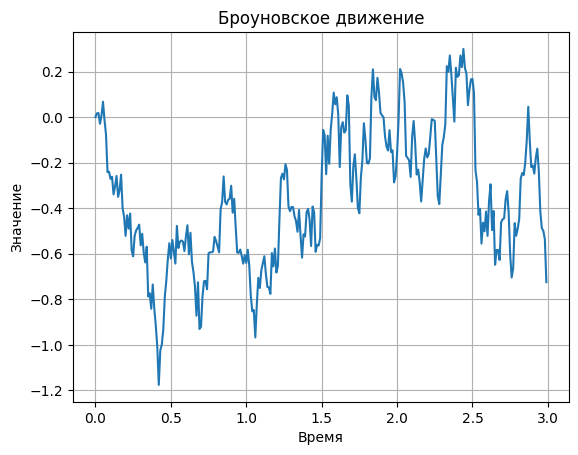

In [ ]:
n = 300
dt = 0.01
# Генерируем случайные приращения
increments = np.concatenate(([0], np.random.normal(0, np.sqrt(dt), n-1)))

# Вычисляем накопленные значения (броуновское движение)
brownian_motion = np.cumsum(increments)

# Создаем массив временных шагов
time = np.arange(0, n) * dt

# Построение графика броуновского движения
plt.plot(time, brownian_motion)
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Броуновское движение')
plt.grid(True)
plt.show()


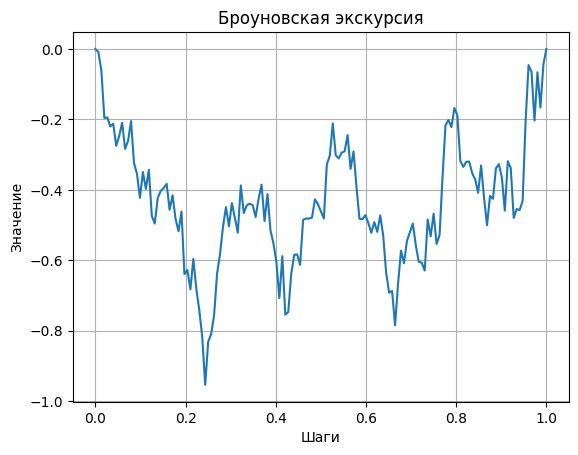

In [ ]:
# Генерируем случайные приращения, пока не достигнем значения 1
ind_ = 98
val_ = brownian_motion[ind_]
while val_ != 0 and brownian_motion[ind_] * brownian_motion[ind_-1] > 0:
    ind_ -= 1
    val_ = brownian_motion[ind_]

ind = 100
val = brownian_motion[ind]
while  val_ != 0 and brownian_motion[ind+1]*brownian_motion[ind] > 0:
    ind += 1
    val = brownian_motion[ind]

excursion = brownian_motion[ind_:ind+1]
if brownian_motion[ind_] != 0:
    excursion = np.concatenate(([0], excursion))
    ind_ -= 1
if brownian_motion[ind] != 0:
    excursion = np.concatenate((excursion, [0]))
    ind += 1

time = np.arange(0, ind - ind_ + 1) * dt
c = np.max(time)
# Построение графика броуновской экскурсии
plt.plot(time / c, excursion / c**0.5)
plt.xlabel('Шаги')
plt.ylabel('Значение')
plt.title('Броуновская экскурсия')
plt.grid(True)
plt.show()


3. Исследовать закон арксинуса для
iii) время выше оси для случайного блуждания с шагами \
а) N (0, 1), \
б) (1) − 1,  
в) X = δε, P(δ = 1) = P(δ = −1) = 1/2, P(ε > x) = 1/x^(7/6), x ≥ 1, где δ, ε предполагаются независимыми.

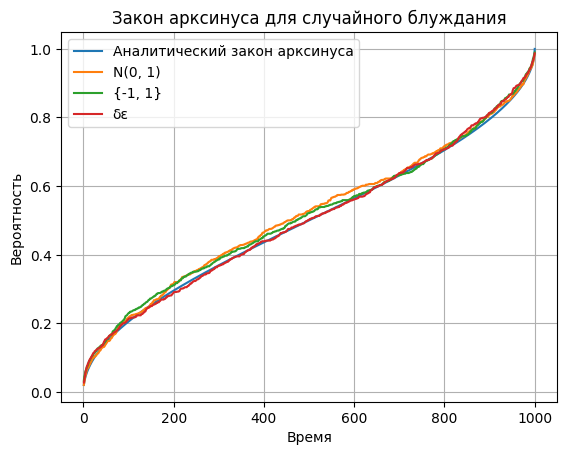

In [ ]:
def probability_above_axis(steps):
    t = np.arange(1, steps+1)
    probability = 2 / np.pi * np.arcsin(np.sqrt(t / steps))
    return t, probability

def generate_random_walks_N(num_walks, n_steps):
    walks = np.zeros((num_walks, n_steps))
    for i in range(num_walks):
        steps = np.random.normal(0, 1, size=n_steps)
        walks[i] = np.cumsum(steps)
        walks[i] = [1 if walks[i][j] > 0 else 0 for j in range(len(walks[i]))]

    return walks

def generate_random_walks_uni(num_walks, n_steps):
    walks = np.zeros((num_walks, n_steps))
    for i in range(num_walks):
        steps = np.random.choice([-1, 1], size=n_steps)
        walks[i] = np.cumsum(steps)
        walks[i] = [1 if walks[i][j] > 0 else 0 for j in range(len(walks[i]))]
    return walks

def generate_random_walks_de(num_walks, n_steps):
    walks = np.zeros((num_walks, n_steps))
    for i in range(num_walks):
        delta = np.random.choice([-1, 1], size=n_steps)
        epsilon = np.random.pareto(7/6, size=n_steps) + 1
        steps = delta * epsilon
        walks[i] = np.cumsum(steps)
        walks[i] = [1 if walks[i][j] > 0 else 0 for j in range(len(walks[i]))]
    return walks

def fraction_below_time(walks, x):
    num_walks, steps = walks.shape
    l = len(x)
    fractions = np.zeros(l, dtype=float)
    upper_times = np.zeros(num_walks, dtype=float)
    for i in range(num_walks):
        upper_times[i] = np.sum(walks[i]) / steps

    for t in range(l):
        fractions[t] = np.mean((upper_times < x[t]).astype(int))

    return fractions

# Количество траекторий и количество временных шагов
num_walks = 1000
steps = 1000

t, probability = probability_above_axis(steps)

plt.plot(t, probability, label='Аналитический закон арксинуса')

# а
walks = generate_random_walks_N(num_walks, steps)
probability_simulation = fraction_below_time(walks, t/steps)

plt.plot(t, probability_simulation, label='N(0, 1)')


# б
walks = generate_random_walks_uni(num_walks, steps)
probability_simulation = fraction_below_time(walks, t/steps)

plt.plot(t, probability_simulation, label='{-1, 1}')

# в
walks = generate_random_walks_uni(num_walks, steps)
probability_simulation = fraction_below_time(walks, t/steps)

plt.plot(t, probability_simulation, label='δε')



plt.xlabel('Время')
plt.ylabel('Вероятность')
plt.title('Закон арксинуса для случайного блуждания')
plt.legend()
plt.grid(True)
plt.show()
